### ***This Notebook highlights the concept of model overfitting in deep learning***

**Model Overfitting :**


In deep learning, model overfitting occurs when a machine learning model learns to perform well on the training data but fails to generalize to unseen data, such as validation or test data. Overfitting happens when the model learns the noise and details in the training data too well, capturing patterns that are specific to the training set but do not generalize to new data.


<br>
<center>
<table>
  <tr><td>
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-04-at-1.53.35-AM.png"
         alt="Fashion MNIST sprite" height="210">
  </td>

  <td>
    <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/Screen-Shot-2018-04-03-at-10.37.28-PM.png"
         alt="Fashion MNIST sprite">
  </td>
  
  </tr>
  <tr><td align="center">
    <b>Figure 1.</b> Overfitting<br/>&nbsp;
  </td>
  
  <td align="center">
    <b>Figure 1.</b> Appropriate fitting<br/>&nbsp;
  </td>
  
  </tr>
</table>
</center>



The causes of model overfitting in deep learning include:

1. Insufficient training data
2. Complexity of the model
3. Noise in the data
4. Too many training epochs
5. Complexity of the task

Methods to prevent model overfitting in deep learning include:

1. Regularization techniques like L1 and L2 regularization, dropout, and early stopping.
2. Data augmentation to increase the diversity and size of the training data.
3. Simplifying the model architecture.
4. Cross-validation to assess model performance and detect overfitting.
5. Adding more training data if possible.

---
**Let us train a basic CNN model on Fashion MNIST (as done in previous notebook) without using any overfitting preventive measure.**

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

print(tf.__version__)

2.15.0


In [2]:
# keras offers direct access to the fashion mnist dataset. Let's import it
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 2s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

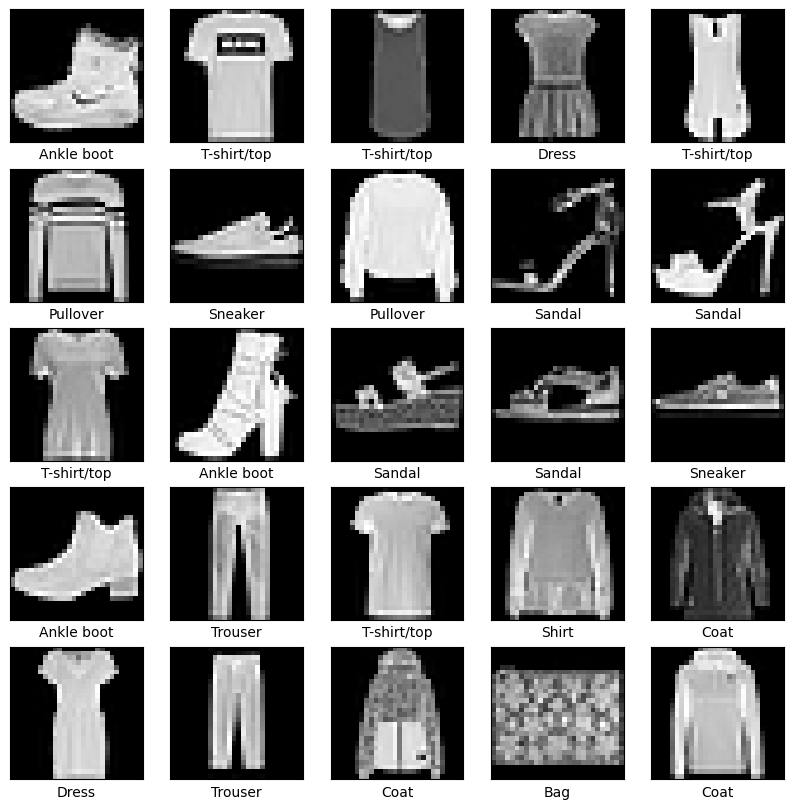

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap="gray")
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
# Scale values to be between 0 and 1

normalize_train_images = train_images / 255.0

normalize_test_images = test_images / 255.0

In [6]:
from keras.utils import to_categorical
import random

In [7]:
#excuting one hot encoding on dataset labels (6  ==>  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.])

encoded_train_labels = to_categorical(train_labels)
encoded_test_labels = to_categorical(test_labels)

In [8]:
from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten
from keras.utils import plot_model

In [9]:
# creating Architecture for training

input_layer = Input((28, 28, 1))
layer_1 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_uniform', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=(2, 2))
flatten_layer = Flatten()
layer_4 = Dense(100, activation='relu', kernel_initializer='he_uniform')
layer_5 = Dense(10, activation='softmax')

model = Sequential([
    input_layer,
    layer_1,
    layer_2,
    flatten_layer,
    layer_4,
    layer_5
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
normal_training_history = model.fit(normalize_train_images, encoded_train_labels,
          validation_data=(normalize_test_images,encoded_test_labels),
          epochs=50)

Epoch 1/50
1875/1875 [==============================] - 11s 4ms/step - loss: 0.3820 - accuracy: 0.8630 - val_loss: 0.2989 - val_accuracy: 0.8932
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2546 - accuracy: 0.9064 - val_loss: 0.2849 - val_accuracy: 0.8926
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2124 - accuracy: 0.9218 - val_loss: 0.2654 - val_accuracy: 0.9046
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1790 - accuracy: 0.9336 - val_loss: 0.2667 - val_accuracy: 0.9065
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1559 - accuracy: 0.9421 - val_loss: 0.2572 - val_accuracy: 0.9108
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1344 - accuracy: 0.9504 - val_loss: 0.2646 - val_accuracy: 0.9117
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1148 - accuracy: 0.9574 - val_loss: 0.2872 - val_accuracy

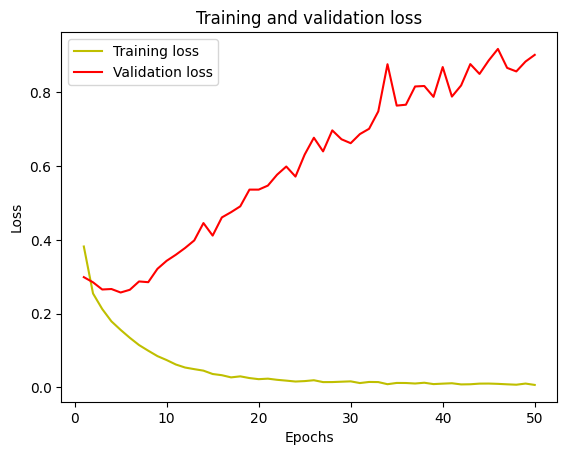

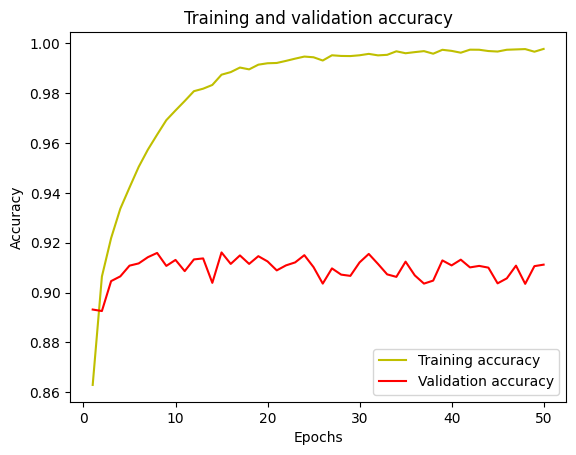

In [11]:
##################################################################

#plot the training and validation IoU and loss at each epoch
loss = normal_training_history.history['loss']
val_loss = normal_training_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = normal_training_history.history['accuracy']
val_acc = normal_training_history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#################################################

In [12]:
import pickle as pkl
with open('normal_training_history.pkl', 'wb') as fp:
    pkl.dump(normal_training_history, fp)
    print('history saved successfully to file')

history saved successfully to file


## **Now applying preventive methods. The commonly used methods are L1 and L2 regularization**

<br>
<center>
<table>
  <tr><td>
    <img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*DmKwOZ5F1kDoReXj0-7xUA.png"
         alt="Fashion MNIST sprite" width="500">
  </td>
  
  </tr>
  <tr><td align="center">
    <b>Figure 1.</b> Regularization methods<br/>&nbsp;
  </td>
  
  </tr>
</table>
</center>


 They involve adding a penalty term to the loss function during training to discourage large weights in the model.

`L1 Regularization (Lasso Regression):`

In L1 regularization, the penalty term added to the loss function is proportional to the absolute values of the weights of the model.
It encourages sparsity in the weight matrix, effectively driving some of the weights to zero.
Mathematically, it adds the sum of the absolute values of the weights to the loss function: λ ||w||₁, where λ is the regularization parameter and ||w||₁ represents the L1 norm of the weight vector.

`L2 Regularization (Ridge Regression):`

In L2 regularization, the penalty term added to the loss function is proportional to the square of the magnitudes of the weights.
It tends to enforce smaller weights for all parameters, rather than driving some to zero as in L1 regularization.
Mathematically, it adds the sum of the squared values of the weights to the loss function: λ ||w||₂², where λ is the regularization parameter and ||w||₂ represents the L2 norm of the weight vector.

<br>
<center>
<table>
  <tr><td>
    <img src="https://miro.medium.com/v2/resize:fit:443/1*er-t1ZVTdNn1DmiccvHDgQ.png"
         alt="Fashion MNIST sprite"  width="330">
  </td>

  <td>
    <img src="https://i.ytimg.com/vi/QNxNCgtWSaY/sddefault.jpg"
         alt="Fashion MNIST sprite"  width="330">
  </td>
  
  </tr>
  <tr><td align="center">
    <b>Figure 1.</b> L1 and L2 Regularisation<br/>&nbsp;
  </td>
  
  <td align="center">
    <b>Figure 1.</b> L1 and L2 Regularisation<br/>&nbsp;
  </td>
  
  </tr>
</table>
</center>

In [13]:
from keras import regularizers

In [15]:
# creating architecture again but this time adding L1 and L2 regularization terms

# creating Architecture for training

input_layer = Input((28, 28, 1))
layer_1 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_uniform', input_shape=(28, 28, 1),
                 kernel_regularizer=regularizers.L1L2(l1=0.02, l2=0.05))
layer_2 = MaxPooling2D(pool_size=(2, 2))
flatten_layer = Flatten()
layer_4 = Dense(100, activation='relu', kernel_initializer='he_uniform',
                kernel_regularizer=regularizers.L1L2(l1=0.02, l2=0.05),
                bias_regularizer=regularizers.L1L2(l1=0.02, l2=0.05))
layer_5 = Dense(10, activation='softmax')

L1L2_regularized_model = Sequential([
    input_layer,
    layer_1,
    layer_2,
    flatten_layer,
    layer_4,
    layer_5
])

L1L2_regularized_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
L1L2_regularized_model_history = L1L2_regularized_model.fit(normalize_train_images, encoded_train_labels,
          validation_data=(normalize_test_images,encoded_test_labels),
          epochs=50)

Epoch 1/50
1875/1875 [==============================] - 12s 6ms/step - loss: 4.9937 - accuracy: 0.6595 - val_loss: 2.6080 - val_accuracy: 0.7180
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 2.5119 - accuracy: 0.7321 - val_loss: 2.4401 - val_accuracy: 0.7408
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4175 - accuracy: 0.7419 - val_loss: 2.3549 - val_accuracy: 0.7428
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3506 - accuracy: 0.7452 - val_loss: 2.3166 - val_accuracy: 0.7491
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3182 - accuracy: 0.7491 - val_loss: 2.3030 - val_accuracy: 0.7527
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 2.2800 - accuracy: 0.7521 - val_loss: 2.2686 - val_accuracy: 0.7499
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2622 - accuracy: 0.7534 - val_loss: 2.2468 - val_accuracy

In [17]:
import pickle as pkl
with open('L1L2_regularized_model_history.pkl', 'wb') as fp:
    pkl.dump(L1L2_regularized_model_history, fp)
    print('history saved successfully to file')

history saved successfully to file


### **Applying dropouts**

Dropout is a regularization technique used in deep learning, where randomly selected neurons are ignored or "dropped out" during training, reducing overfitting by preventing co-adaptation of feature detectors.


<br>
<center>
<table>
  <tr><td>
    <img src="https://miro.medium.com/v2/resize:fit:1036/0*EY8R7nS10y5kQzOx"
         alt="Fashion MNIST sprite" width="400">
  </td>
  
  </tr>
  <tr><td align="center">
    <b>Figure 1.</b> Dropouts<br/>&nbsp;
  </td>
  
  </tr>
</table>
</center>

In [18]:
# creating Architecture for training

input_layer = Input((28, 28, 1))
layer_1 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_uniform', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=(2, 2))
flatten_layer = Flatten()
layer_4 = Dense(100, activation='relu', kernel_initializer='he_uniform')
layer_5 = Dense(10, activation='softmax')

dropout_layer_model = Sequential([
    input_layer,
    layer_1,
    Dropout(rate=0.1),      # <== dropout layer with 10% of intermediate(hidden) layers units dropouts
    layer_2,
    flatten_layer,
    layer_4,
    Dropout(rate=0.2),      # <== dropout layer
    layer_5
])

dropout_layer_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
dropout_layer_model_history = dropout_layer_model.fit(normalize_train_images, encoded_train_labels,
          validation_data=(normalize_test_images,encoded_test_labels),
          epochs=50)

Epoch 1/50
1875/1875 [==============================] - 11s 4ms/step - loss: 0.4202 - accuracy: 0.8503 - val_loss: 0.3262 - val_accuracy: 0.8819
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2937 - accuracy: 0.8925 - val_loss: 0.2834 - val_accuracy: 0.8973
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2503 - accuracy: 0.9080 - val_loss: 0.2714 - val_accuracy: 0.9007
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2221 - accuracy: 0.9165 - val_loss: 0.2578 - val_accuracy: 0.9056
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1975 - accuracy: 0.9253 - val_loss: 0.2478 - val_accuracy: 0.9128
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1788 - accuracy: 0.9338 - val_loss: 0.2474 - val_accuracy: 0.9152
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1604 - accuracy: 0.9385 - val_loss: 0.2502 - val_accuracy

In [20]:
import pickle as pkl
with open('dropout_layer_model_history.pkl', 'wb') as fp:
    pkl.dump(dropout_layer_model_history, fp)
    print('history saved successfully to file')

history saved successfully to file


### **Applying Early stopping based on validation loss supervision**

Early stopping is a regularization technique used during the training of convolutional neural network (CNN) models. It involves monitoring the performance of the model on a validation dataset during training and halting the training process when the performance stops improving or begins to degrade. This prevents overfitting and helps to find the point where the model generalizes best to unseen data.


<br>
<center>
<table>
  <tr><td>
    <img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/early-stopping-en.png?a8aacdfe0c39776d86764857222e19dd"
         alt="Fashion MNIST sprite" width="400">
  </td>
  
  </tr>
  <tr><td align="center">
    <b>Figure 1.</b> Early Stopping<br/>&nbsp;
  </td>
  
  </tr>
</table>
</center>

In [21]:
from keras.callbacks import EarlyStopping

In [28]:
# creating Architecture for training

input_layer = Input((28, 28, 1))
layer_1 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_uniform', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=(2, 2))
flatten_layer = Flatten()
layer_4 = Dense(100, activation='relu', kernel_initializer='he_uniform')
layer_5 = Dense(10, activation='softmax')

early_stopping_model = Sequential([
    input_layer,
    layer_1,
    layer_2,
    flatten_layer,
    layer_4,
    layer_5
])


early_stopping_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# simple early stopping callback function
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

early_stopping_model_history = early_stopping_model.fit(normalize_train_images, encoded_train_labels,
          validation_data=(normalize_test_images,encoded_test_labels),
          epochs=50,callbacks=[early_stopping])

Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3787 - accuracy: 0.8665 - val_loss: 0.3165 - val_accuracy: 0.8813
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2566 - accuracy: 0.9066 - val_loss: 0.2759 - val_accuracy: 0.9002
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2126 - accuracy: 0.9216 - val_loss: 0.2693 - val_accuracy: 0.9039
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1792 - accuracy: 0.9341 - val_loss: 0.2573 - val_accuracy: 0.9123
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1529 - accuracy: 0.9423 - val_loss: 0.2727 - val_accuracy: 0.9075
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1306 - accuracy: 0.9515 - val_loss: 0.2802 - val_accuracy: 0.9101
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1132 - accuracy: 0.9573 - val_loss: 0.2737 - val_accurac

In [30]:
import pickle as pkl
with open('early_stopping_model_history.pkl', 'wb') as fp:
    pkl.dump(early_stopping_model_history, fp)
    print('history saved successfully to file')

history saved successfully to file


### **Dataset Augmentation**

<br>
<center>
<table>
  <tr><td>
    <img src="https://ubiai.tools/wp-content/uploads/2023/11/UKwFg.jpg"
         alt="Fashion MNIST sprite" width="500">
  </td>
  
  </tr>
  <tr><td align="center">
    <b>Figure 1.</b> Dataset Augmentation<br/>&nbsp;
  </td>
  
  </tr>
</table>
</center>

In [31]:
from keras.preprocessing.image import ImageDataGenerator

In [41]:
dataset_images_DataGenerator = ImageDataGenerator(rotation_range=10,
                                                  width_shift_range=0.13,
                                                  height_shift_range=0.13,
                                                  zoom_range=0.13,
                                                  horizontal_flip=True)

training_images = np.expand_dims(normalize_train_images,axis=-1)
training_labels = encoded_train_labels
images_DataGenerator_Batch = dataset_images_DataGenerator.flow(training_images, training_labels,
                                                               batch_size=32,seed=42)

validation_images = np.expand_dims(normalize_test_images,axis=-1)
validation_labels = encoded_test_labels

# Validation Image Data generator
validation_set_images_DataGenerator = ImageDataGenerator()
validation_images_DataGenerator_Batch = validation_set_images_DataGenerator.flow(validation_images, validation_labels,
                                                               batch_size=32,seed=42)

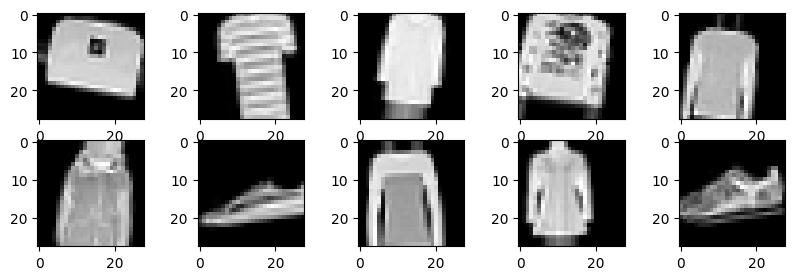

In [42]:
plt.figure(figsize=(10,8))
#Plots our figures
for i in range(1,11):
  plt.subplot(5, 5, i)
  batch = images_DataGenerator_Batch.next()
  image_ = batch[0][i]
  # plt.imshow(image_, cmap='gray')
  plt.imshow(image_, cmap='gray')
plt.show()

In [43]:

# creating Architecture for training

input_layer = Input((28, 28, 1))
layer_1 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_uniform', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=(2, 2))
flatten_layer = Flatten()
layer_4 = Dense(100, activation='relu', kernel_initializer='he_uniform')
layer_5 = Dense(10, activation='softmax')

images_augmentation_model = Sequential([
    input_layer,
    layer_1,
    layer_2,
    flatten_layer,
    layer_4,
    layer_5
])


images_augmentation_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
images_augmentation_model_history = images_augmentation_model.fit_generator(images_DataGenerator_Batch,
                    steps_per_epoch=len(training_images) / 32, epochs=50,
                    validation_data=validation_images_DataGenerator_Batch,
                              validation_steps = len(normalize_test_images)/32)

Epoch 1/50


<ipython-input-44-9c2383104682>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  images_augmentation_model_history = images_augmentation_model.fit_generator(images_DataGenerator_Batch,


1875/1875 [==============================] - 27s 14ms/step - loss: 0.7457 - accuracy: 0.7201 - val_loss: 0.5056 - val_accuracy: 0.8188
Epoch 2/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5602 - accuracy: 0.7888 - val_loss: 0.4652 - val_accuracy: 0.8282
Epoch 3/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5102 - accuracy: 0.8078 - val_loss: 0.4294 - val_accuracy: 0.8485
Epoch 4/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4821 - accuracy: 0.8181 - val_loss: 0.4128 - val_accuracy: 0.8492
Epoch 5/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4582 - accuracy: 0.8284 - val_loss: 0.4014 - val_accuracy: 0.8585
Epoch 6/50
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4452 - accuracy: 0.8333 - val_loss: 0.3906 - val_accuracy: 0.8580
Epoch 7/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4333 - accuracy: 0.8379 - val_loss: 0.4098 - val_accura

In [46]:
import pickle as pkl
with open('images_augmentation_model_history.pkl', 'wb') as fp:
    pkl.dump(images_augmentation_model_history, fp)
    print('history saved successfully to file')

history saved successfully to file


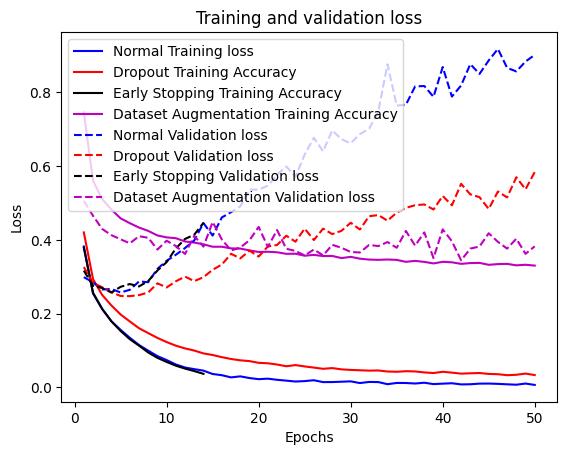

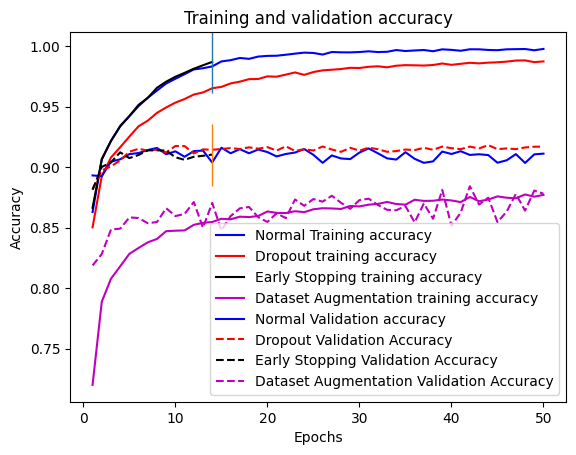

In [66]:
##################################################################

#plot the training and validationloss at each epoch
loss = normal_training_history.history['loss']
L1L2_regularized_model_loss = L1L2_regularized_model_history.history['loss']
dropout_layer_model_loss = dropout_layer_model_history.history['loss']
early_stopping_model_loss = early_stopping_model_history.history['loss']
images_augmentation_model_loss = images_augmentation_model_history.history['loss']


val_loss = normal_training_history.history['val_loss']
L1L2_regularized_model_val_loss = L1L2_regularized_model_history.history['val_loss']
dropout_layer_model_val_loss = dropout_layer_model_history.history['val_loss']
early_stopping_model_val_loss = early_stopping_model_history.history['val_loss']
images_augmentation_model_val_loss = images_augmentation_model_history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Normal Training loss')
#plt.plot(epochs, L1L2_regularized_model_loss, 'g', label='L1 & L2 Regularization Training Accuracy')
plt.plot(epochs, dropout_layer_model_loss, 'r', label='Dropout Training Accuracy')
plt.plot(range(1, len(early_stopping_model_loss) + 1), early_stopping_model_loss, 'k', label='Early Stopping Training Accuracy')
plt.plot(epochs, images_augmentation_model_loss, 'm', label='Dataset Augmentation Training Accuracy')

plt.plot(epochs, val_loss, 'b', label='Normal Validation loss',linestyle='dashed')
# plt.plot(epochs, L1L2_regularized_model_val_loss, 'g', label='L1 & L2 Regularization Validation loss',
#          linestyle='dashed')
plt.plot(epochs, dropout_layer_model_val_loss, 'r', label='Dropout Validation loss',
         linestyle='dashed')
plt.plot(range(1, len(early_stopping_model_loss) + 1), early_stopping_model_val_loss, 'k', label='Early Stopping Validation loss',
         linestyle='dashed')
plt.plot(epochs, images_augmentation_model_val_loss, 'm', label='Dataset Augmentation Validation loss',
         linestyle='dashed')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = normal_training_history.history['accuracy']
L1L2_regularized_model_acc = L1L2_regularized_model_history.history['accuracy']
dropout_layer_model_acc = dropout_layer_model_history.history['accuracy']
early_stopping_model_acc = early_stopping_model_history.history['accuracy']
images_augmentation_model_acc = images_augmentation_model_history.history['accuracy']

val_acc = normal_training_history.history['val_accuracy']
L1L2_regularized_model_val_acc = L1L2_regularized_model_history.history['val_accuracy']
dropout_layer_model_val_acc = dropout_layer_model_history.history['val_accuracy']
early_stopping_model_val_acc = early_stopping_model_history.history['val_accuracy']
images_augmentation_model_val_acc = images_augmentation_model_history.history['val_accuracy']


plt.plot(epochs, acc, 'b', label='Normal Training accuracy')
# plt.plot(epochs, L1L2_regularized_model_acc, 'g', label='L1 & L2 Regularization training accuracy')
plt.plot(epochs, dropout_layer_model_acc, 'r', label='Dropout training accuracy')
plt.plot(range(1, len(early_stopping_model_loss) + 1), early_stopping_model_acc, 'k', label='Early Stopping training accuracy')

plt.plot(range(len(early_stopping_model_acc), len(early_stopping_model_acc) + 1) ,
         early_stopping_model_acc[-1], marker='|', markersize=45)

plt.plot(epochs, images_augmentation_model_acc, 'm', label='Dataset Augmentation training accuracy')

plt.plot(epochs, val_acc, 'b', label='Normal Validation accuracy')
# plt.plot(epochs, L1L2_regularized_model_val_acc, 'g', label='L1 & L2 Regularization Validation Accuracy',
#          linestyle='dashed')
plt.plot(epochs, dropout_layer_model_val_acc, 'r', label='Dropout Validation Accuracy',linestyle='dashed')
plt.plot(range(1, len(early_stopping_model_loss) + 1), early_stopping_model_val_acc, 'k',
         label='Early Stopping Validation Accuracy',linestyle='dashed')

plt.plot(range(len(early_stopping_model_loss), len(early_stopping_model_loss) + 1) ,
         early_stopping_model_val_acc[-1], marker='|', markersize=45)


plt.plot(epochs, images_augmentation_model_val_acc, 'm', label='Dataset Augmentation Validation Accuracy',
         linestyle='dashed')


plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#################################################